# Health Insurance Premium Amount Prediction Model

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings as w

In [3]:
w.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../../../datasets/Internship_datasets/Health_Insurance/Health_insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
df.shape

(1338, 7)

# Handling Missing Values

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Handling Duplicate Values

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.duplicated().sum()

0

# Handling Outliers

(array([535., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

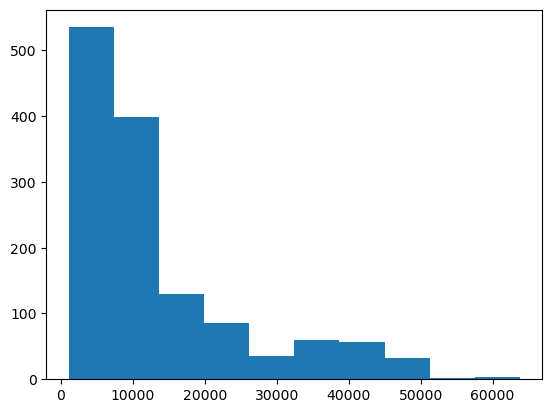

In [14]:
plt.hist(df['charges'])

In [15]:
df.shape

(1337, 7)

In [16]:
df = df[df['charges']<50000]

In [17]:
df.shape

(1330, 7)

# Train Test Split

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
X = df[df.columns.drop('charges')]
y = df['charges']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=1)

In [23]:
df_train = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)], axis=1)

In [24]:
df_test = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test)], axis=1)

# Category & Numeric Columns

In [26]:
cat_col = list(df_test.select_dtypes(include='object'))

In [27]:
num_col = list(df_test.select_dtypes(exclude='object').drop(columns='charges').columns)

In [28]:
num_col

['age', 'bmi', 'children']

# Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(df_train[cat_col])
enc_col = list(encoder.get_feature_names_out())
df_train[enc_col] = encoder.transform(df_train[cat_col])

# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
scaler.fit(df_train[num_col])
df_train[num_col] = scaler.transform(df_train[num_col])

# Selected Data Columns

In [36]:
sel_col = enc_col + num_col

# Test Data

In [38]:
df_test[enc_col] = encoder.transform(df_test[cat_col])

In [39]:
df_test[num_col] = scaler.transform(df_test[num_col])

# X & y for Training

In [41]:
X_train_M = df_train[sel_col]
y_train_M = df_train['charges']

# X & y for Testing

In [43]:
X_test_M = df_test[sel_col]
y_test_M = df_test['charges']

# Model Building

## Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model_lin = LinearRegression()
model_lin.fit(X_train_M,y_train_M)
print('Training Score',model_lin.score(X_train_M,y_train_M),'Testing Score',model_lin.score(X_test_M,y_test_M))

Training Score 0.7450577267419856 Testing Score 0.8088013541687484


## SVM

In [49]:
from sklearn.svm import SVR

In [50]:
model_svm = SVR(kernel='linear')
model_svm.fit(X_train_M,y_train_M)
print('Training Score',model_svm.score(X_train_M,y_train_M),'Testing Score',model_svm.score(X_test_M,y_test_M))

Training Score -0.06951737131849511 Testing Score -0.08324568267367294


## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
model_DT = DecisionTreeRegressor(random_state=1, max_depth=5, min_samples_leaf=5, min_samples_split=2)
model_DT.fit(X_train_M,y_train_M)
print('Training Score',model_DT.score(X_train_M,y_train_M),'Testing Score',model_DT.score(X_test_M,y_test_M))

Training Score 0.8752116584145294 Testing Score 0.8969690829140885


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model_DT = RandomForestRegressor(random_state=1, n_estimators=500, min_samples_split=5, min_samples_leaf=6, max_depth=20)
model_DT.fit(X_train_M,y_train_M)
print('Training Score',model_DT.score(X_train_M,y_train_M),'Testing Score',model_DT.score(X_test_M,y_test_M))

Training Score 0.9016577801046771 Testing Score 0.8907274790226097


In [138]:
from sklearn.ensemble import AdaBoostRegressor

In [164]:
model_AB = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=1)
                             ,n_estimators=1000,learning_rate=2.0,random_state=1)
model_AB.fit(X_train_M,y_train_M)
print('Training Score',model_AB.score(X_train_M,y_train_M),'Testing Score',model_AB.score(X_test_M,y_test_M))

Training Score 0.9856067353004572 Testing Score 0.8837606513493964


In [148]:
from sklearn.model_selection import GridSearchCV

In [150]:
AB_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400],
    'learning_rate': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
}

In [162]:
grid_AB = GridSearchCV(estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=1))
                       ,param_grid=AB_grid,verbose=0,cv=5,n_jobs=-1)
grid_AB.fit(X_train_M,y_train_M)
grid_AB.best_params_

{'learning_rate': 2.0, 'n_estimators': 1000}

## XGB Boost

In [58]:
from xgboost import XGBRegressor

model_xg = XGBRegressor(random_state = 1, subsample=0.8, n_estimators=400, max_depth=3, learning_rate=0.01)
model_xg.fit(X_train_M, y_train_M)
model_xg.score(X_test_M,y_test_M)*100

90.40066236335934

# Hyper Tunning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
DT_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10, 15, 20, 25, 30, 35, 40,],
}

In [62]:
grid_cv_DT = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),param_grid=DT_grid,verbose=0,cv=5,n_jobs=-1)
grid_cv_DT.fit(X_train_M,y_train_M)
grid_cv_DT.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
RF_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400],
    'max_depth': [2, 5, 10, 20, 30, 40, 50, 60, 70], 
    'min_samples_split': [2, 5, 10, 15, 20], 
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

In [65]:
grid_cv_RF_RS = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=1),param_distributions=RF_grid,cv=5,n_jobs=-1,random_state=1)
grid_cv_RF_RS.fit(X_train_M,y_train_M)
grid_cv_RF_RS.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 20}

In [66]:
xgb_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0, 1.2],
}

In [67]:
grid_cv_xgb = RandomizedSearchCV(estimator=XGBRegressor(random_state=1),param_distributions=xgb_grid,cv=5,
                                 n_jobs=-1,random_state=1,scoring='neg_mean_squared_error', n_iter=100)
grid_cv_xgb.fit(X_train_M,y_train_M)
grid_cv_xgb.best_params_

{'subsample': 0.8, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01}

# Testing 

In [69]:
ya = y_test_M
yp = model_xg.predict(X_test_M)
diff = ya-yp

In [70]:
P = pd.DataFrame({'Y_actual':ya, 'Y_predict':yp, 'Y_difference':diff})

In [71]:
P[:10]

,Y_actual,Y_predict,Y_difference
1264,10370.91255,11148.031250,-777.118700
326,3561.88890,5961.664062,-2399.775163
935,12233.82800,14346.020508,-2112.192508
1025,2020.17700,3124.161865,-1103.984865
1160,7727.25320,9325.541992,-1598.288792
768,14319.03100,14405.829102,-86.798102
121,1705.62450,3363.184814,-1657.560314
66,14235.07200,16963.017578,-2727.945578
781,1146.79660,2999.743408,-1852.946808
1129,1728.89700,2844.177002,-1115.280002


In [72]:
sel_col

['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age',
 'bmi',
 'children']

In [73]:
Q_e = [[1,0,1,0,1,0,0,0]]

In [74]:
Q_s_1 = [[50,25,4]]

In [75]:
Q_s_2 = scaler.transform(Q_s_1)

In [76]:
Q_s_2

array([[0.69565217, 0.24320689, 0.8       ]])

In [77]:
Q = [[1,0,1,0,1,0,0,0,0.69565217, 0.24320689, 0.8]]

In [78]:
model_xg.predict(Q)

array([11662.932], dtype=float32)

In [168]:
import pickle

In [170]:
pickle.dump(model_xg,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(encoder,open('encoder.pkl','wb'))